In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

file_name = 'HistoricalData_1707693053191.csv'
df = pd.read_csv(file_name)

Saving HistoricalData_1707693053191.csv to HistoricalData_1707693053191.csv


In [ ]:
df

,Date,Close/Last,Volume,Open,High,Low
0,02/09/2024,$193.57,84476350,$190.18,$194.12,$189.48
1,02/08/2024,$189.56,83034040,$189.00,$191.6171,$185.58
2,02/07/2024,$187.58,111535200,$188.18,$189.79,$182.68
3,02/06/2024,$185.10,122676000,$177.21,$186.49,$177.11
4,02/05/2024,$181.06,134294400,$184.26,$184.68,$175.01
...,...,...,...,...,...,...
245,02/17/2023,$208.31,213738500,$199.985,$208.44,$197.50
246,02/16/2023,$202.04,229586500,$210.78,$217.65,$201.84
247,02/15/2023,$214.24,182108600,$211.755,$214.66,$206.11
248,02/14/2023,$209.25,216455700,$191.94,$209.82,$189.44


In [ ]:
## df.shape() -> (rows, columns)
# print(df.shape)
m = df.shape[0]
n = df.shape[1]
print(m)
time = df['Date']
closing = df['Close/Last']

## accessing element e_mn
type(df['Close/Last'][0])
print(type(float('123.4')))


for i in range(m):
  #print((df['Close/Last'][i]))
  df['Close/Last'][i] = float((df['Close/Last'][i])[1:])
  #print(type(df['Close/Last'][i])) #= float((df['Close/Last'][i])[1:])
  df['Open'][i] = float((df['Open'][i])[1:])
  df['High'][i] = float((df['High'][i])[1:])
  df['Low'][i] = float((df['Low'][i])[1:])

df['Date'] = pd.to_datetime(df['Date'])



# type(df['Close/Last'][2])
# df['Close/Last'][2]

250
<class 'float'>


<ipython-input-4-190471e191c3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close/Last'][i] = float((df['Close/Last'][i])[1:])
<ipython-input-4-190471e191c3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open'][i] = float((df['Open'][i])[1:])
<ipython-input-4-190471e191c3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'][i] = float((df['High'][i])[1:])
<ipython-input-4-190471e191c3>:20: SettingWithCopyWarni

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%m/%d')

In [ ]:
def plot_sma(x, y, n, m, col):
  y_sma = []
  for i in range(m-n-1):
     y_sma.append(sum(y[i:i+n])/n)
  axs[1].plot(x[:len(y_sma)], y_sma, col + '--')
  axs[1].legend(str(n))

[False, False, False, False, True, True, False, True, False, False, False, True, True, False, True, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, False, False, True, False, True, False, True, False, False, False, True, True, False, False, False, False, True, True, True, True, False, False, False, True, False, False, False, True, False, False, False, False, True, True, False, True, False, False, False, False, True, False, True, True, False, False, True, True, True, False, False, True, True, True, False, True, False, True, False, True, False, False, False, True, True, False, True, True, True, False, True, True, False, False, True, False, True, True, True, False, True, False, True, False, False, False, True, False, False, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, True, False, False, False, False, False, False, True, True, True, False, False, 

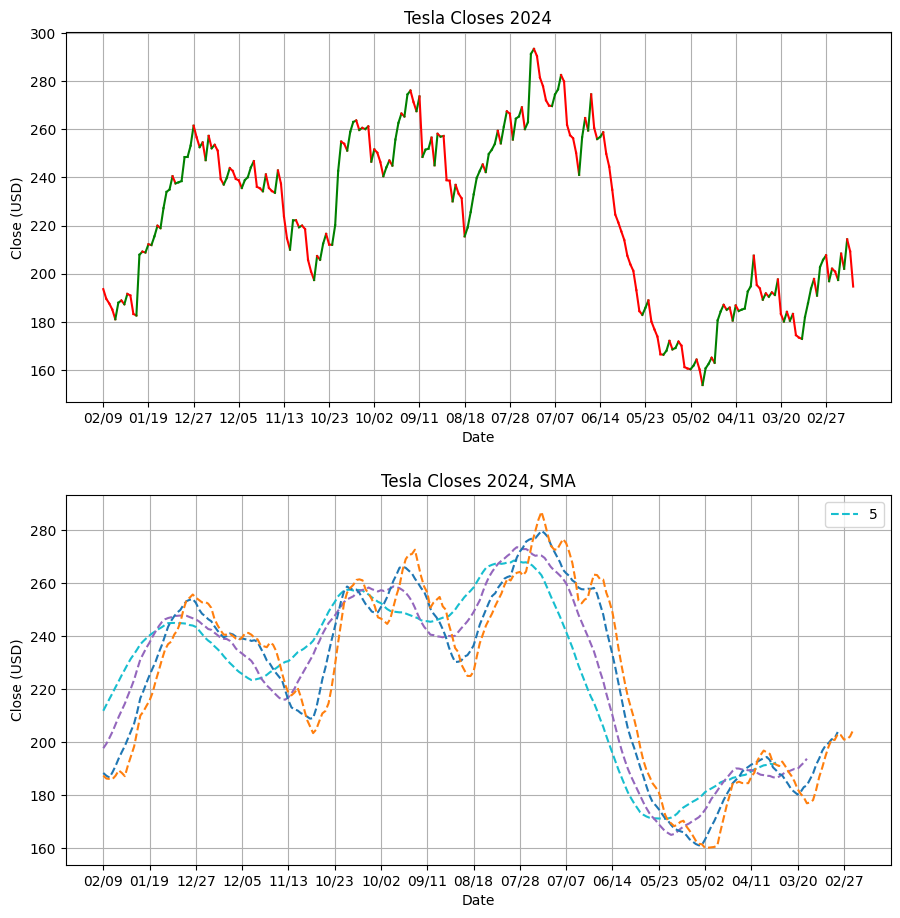

In [ ]:
# times = np.arange(22)
# plt.scatter(times, closing) # scatter plot for the poinst

fig, axs = plt.subplots(2)



fig.set_figheight(10)
fig.set_figwidth(10)

times = df['Date']

is_inc = [closing[i] <= closing[i+1] for i in range(m-1)]
print(is_inc)

for i in range(m-1):
  x = [times[i][:5], times[i+1][:5]]
  y = [closing[i], closing[i+1]]
  if y[0] - y[1] < 0: # inc
    axs[0].plot(x, y, 'g-')
  else:
    axs[0].plot(x, y, 'r-')

plot_sma(times, closing, 30, m, 'C9')
plot_sma(times, closing, 20, m, 'C4')
plot_sma(times, closing, 10, m, 'C0')
plot_sma(times, closing, 5, m, 'C1')

fig.tight_layout(pad=5.0)

for ax in axs.flat:
  ax.set_xticks(times[::15])
  ax.set(xlabel = 'Date', ylabel = "Close (USD)")
  ax.grid()

axs[0].set_title("Tesla Closes 2024" )
axs[1].set_title("Tesla Closes 2024, SMA")
plt.show()




Candle Plot

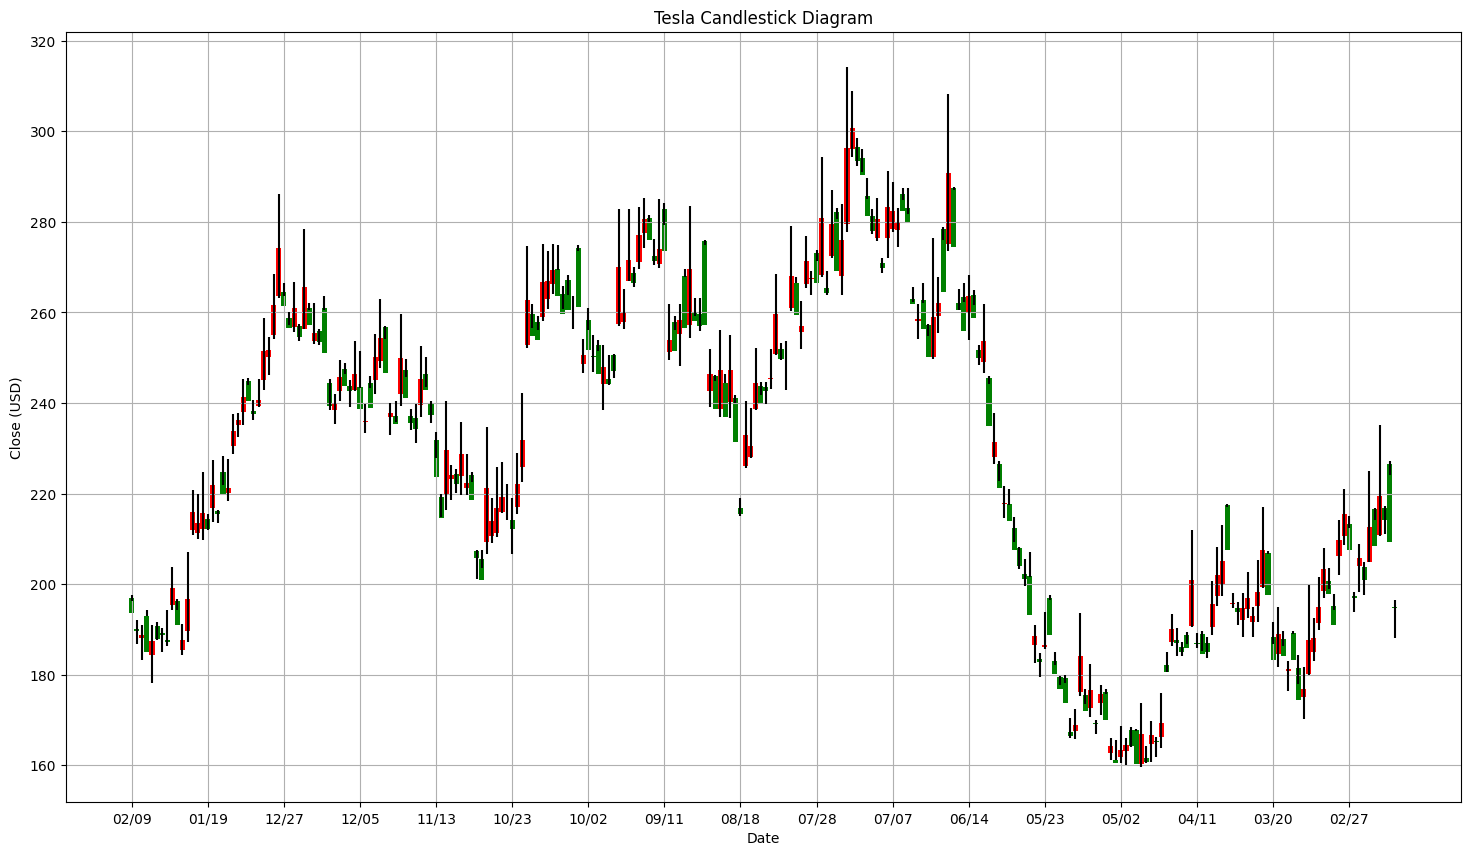

In [ ]:
## structure
# Green: high, close, open, low
# Red: high, open, close, low

# parsing the data


# for i in range(m):
#   df['Open'] = float((df['Open'][i])[1:])


# print(type(df['Open'][1]))
# print(df['Open'][1])

# print(type(df['High'][1]))
# print(df['High'][1])

open = df['Open']
close = df['Close/Last']
high = df['High']
low = df['Low']

fig, ax = plt.subplots()

for i in range(m):
  if close[i] > open[i]: # green inc
    ax.bar(x = times[i], height = close[i] - open[i], width = 1, bottom = close[i], yerr = ([open[i] - low[i]], [high[i] - close[i]]), color = 'g' )
  else: # red dec
    ax.bar(x = times[i], height = abs(close[i] - open[i]), width = 1, bottom = open[i], yerr = ([abs(open[i] - low[i])], [abs(high[i] - close[i])]), color = 'r' )

ax.set_title('Tesla Candlestick Diagram')
ax.set_xticks(times[::15])
ax.set(xlabel = 'Date', ylabel = "Close (USD)")
ax.grid()
